# Task 6 : Prediction using Decision Tree Algorithm

Create the Decision Tree classifier using the given dataset "Iris" & visualize it graphically.
The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

Author : Ayushi Rohatgi

In [7]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#read dataset
data = pd.read_csv("E:\Iris.csv") 

### Basic Details

In [9]:
#display rows & columns
data.shape 

(150, 6)

In [10]:
#display top 5 rows
data.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
#summary of dataframe
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
#check null values
data.isna().sum() 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
#display unique values
data['Species'].unique() 

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Pre Processing steps

In [14]:
#change iris class types to numeric values
species = {'Iris-setosa': 0,'Iris-versicolor':1,'Iris-virginica':2}

In [15]:
#map iris class types
data['Species'] = data['Species'].map(species)

In [16]:
#check if mapping is done 
data.Species.unique() 

array([0, 1, 2], dtype=int64)

In [17]:
# change the dataset accordingly 
X = data.iloc[:, 1:5].values
y = data.iloc[:, 5].values

In [18]:
X.shape, y.shape

((150, 4), (150,))

### Splitting into train and test set

In [19]:
#splitting dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
# fitting the data into the classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train ,y_train)

# predicting the test values
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

### Decision tree visualization

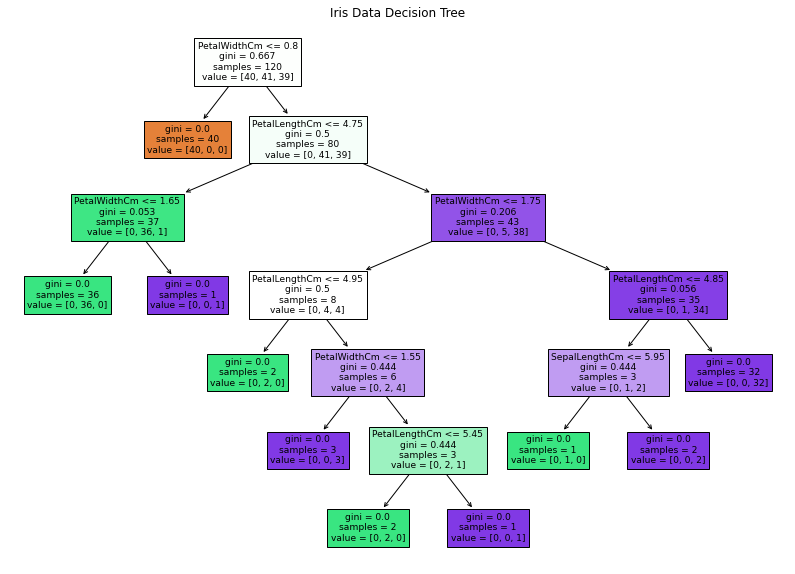

In [21]:
from sklearn import tree
plt.figure(figsize = (14,10))
tree.plot_tree(model,
               feature_names = data.iloc[:, 1:5].columns.values,
               filled = True);
plt.title("Iris Data Decision Tree")
plt.show()

### Predictions

In [22]:
model.predict([[5, 3, 2, 5]])

array([2], dtype=int64)

The sample belongs to Setosa species.

In [23]:
model.predict([[4.9, 3, 5, 1.5]])

array([2], dtype=int64)

The sample belongs to Virginica species

In [24]:
model.predict([[5.9, 1.8, 2.5, 1]])

array([1], dtype=int64)

The sample belongs to Versicolor species.